In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os

In [2]:
datasets = {"agnews": 1 , "mnli": 0, "yahoo": 5, "yelp-full": 0} # "agnews": 1 , "mnli": 0, "yahoo": 5, "yelp-full": 0
all_client_num_in_total_list = {"agnews": 100, "yahoo": 1000, "yelp-full": 1000, "mnli": 1000}
alphas = {"agnews": 1, "yahoo": 0, "yelp-full": 0, "mnli": 0}
gammas = {"agnews": 0.001, "yahoo": 0.001, "yelp-full": 0.001, "mnli": 100}
full_set_acc= {"agnews": 0.93, "yahoo": 0.78, "yelp-full": 0.7, "mnli": 0.85}

filenames = [
    "ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.1.log",
    "ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.2.log",
    "ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.5.log",
    "ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.01.log",
    "ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.05.log",
]
'''

'''

labels = ["filter 0.1", "filter 0.2", "filter 0.5", "filter 0.01", "filter 0.05"]

seed = 42

#

In [3]:
colors=['r','g','b','y','m','k', 'c','r','g','b','y', 'm','k']# 'm','k'
linestyle=['-','-','-','-','-','-','-','--','--','--','--','--','--']
linewidths = [0,0,0,0,0,0,0,1.5,1.5,1.5,1.5,1.5,1.5]

/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-bert-large-11.30/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.1.log
max accuracy is 0.8892105263157895, round is 4
['filter 0.1', 'filter 0.2', 'filter 0.5', 'filter 0.01', 'filter 0.05'] 0
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-bert-large-11.30/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.2.log
max accuracy is 0.8752631578947369, round is 2
['filter 0.1', 'filter 0.2', 'filter 0.5', 'filter 0.01', 'filter 0.05'] 1
/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-bert-large-11.30/agnews/all_100/seed_42/pattern_1/alpha_1_beta_0_gamma_0.001/ours+_fedpet_roberta-large_train_examples_64_f_5_n_1_k_5_filter_0.5.log
max accuracy is 0.6961842105263157, round is 0
['filter 0.1', 'filter 0.2', 'filter 0.5', 'filter 0.01', 

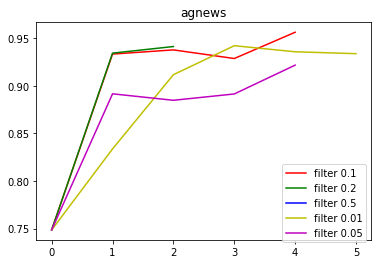

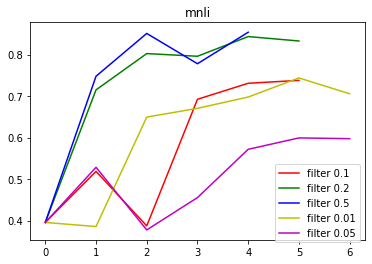

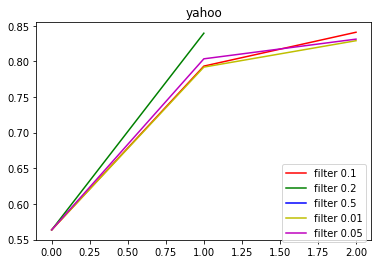

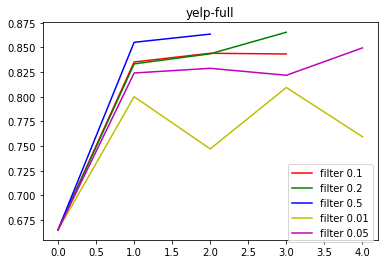

In [4]:
# round to accuracy
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:
    root_path = f"/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-bert-large-11.30/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"


    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase = 'aggregated model performance is'
        with open(log_path) as f:
            f = f.readlines()
        df = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        for line in f:
            if phrase in line:
                gen = int(re.findall(r'Gen (.+?) ',line)[0])
                
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df[0][gen]=acc

        df = df.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        if df.empty:
            print(f"Bug: {log_path}")
            continue

        # print(filename)
        # print(df)
        this_max_acc = np.max(df[0])
        idx = [df[0].to_list().index(x) for x in df[0] if x == this_max_acc][0]
        print(log_path)
        print(f"max accuracy is {this_max_acc}, round is {idx}")
        acc_list[dataset].append(this_max_acc)
        round_list[dataset].append(idx)
        # df.to_csv("/Users/cdq/Desktop/opensource/FedPrompt/data/softlabel/agnews_aug_fedpet_128_32_roberta-large.csv")
        iter = len(df.index)
        y_mean = []
        for j in range(iter):
            y = np.array(df.iloc[j])

            y_mean.append(pd.DataFrame(y).dropna().mean())
            # plt.scatter(j, y)
        print(labels, filenames.index(filename))
        plt.plot(range(iter),np.array(y_mean)/full_set_acc[dataset],label=labels[filenames.index(filename)],color=colors[filenames.index(filename)],linestyle=linestyle[filenames.index(filename)])
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    # fig.savefig(f"../fig/a{i}.pdf")
    i = i+1

agnews:filter 0.1 normal ipet: 0.8988179115032155, vote k: 0.8965221251050632
agnews:filter 0.2 normal ipet: 0.9014691516906022, vote k: 0.9030025329565008
agnews:filter 0.5 normal ipet: 0.9070810556014379, vote k: 0.9087625138809283
agnews:filter 0.01 normal ipet: 0.9019822762111822, vote k: 0.8770018555223942
agnews:filter 0.05 normal ipet: 0.8956749925588567, vote k: 0.8924496857821941
mnli:filter 0.1 normal ipet: 0.7465110163071326, vote k: 0.7428971243210327
mnli:filter 0.2 normal ipet: 0.7388538545491744, vote k: 0.7485007323133639
mnli:filter 0.5 normal ipet: 0.7388538545491744, vote k: 0.7415846921503543
mnli:filter 0.01 normal ipet: 0.7921842163162571, vote k: 0.7908667941888173
mnli:filter 0.05 normal ipet: 0.7681504223039564, vote k: 0.7578628395733081
yahoo:filter 0.1 normal ipet: 0.6345341136327812, vote k: 0.6318260257158961
yahoo:filter 0.2 normal ipet: 0.6353019357791969, vote k: 0.6329898015835456
yahoo:filter 0.5 normal ipet: 0.6467237493236151, vote k: 0.650118438616

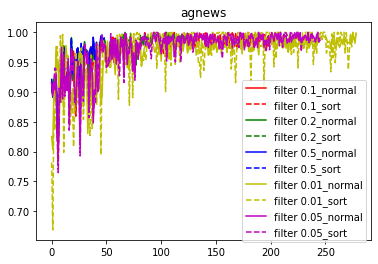

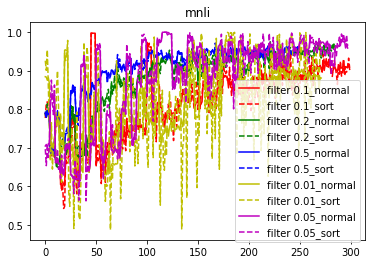

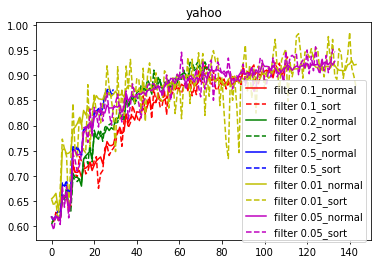

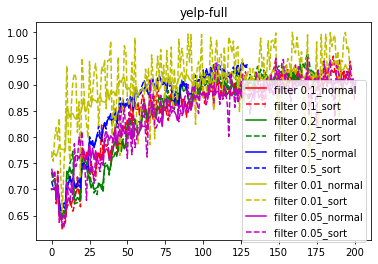

In [13]:
# round to accuracy
i=0

mnli_all_confidence = []
mnli_vote_confidence = []

acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:

    root_path = f"/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-bert-large-11.30/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"


    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase1 = r'Normal ipet selection results. Client'
        phrase2 = r'Vote k selection results. Client'
        with open(log_path) as f:
            f = f.readlines()
        df1 = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        df2 = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        gen = 0
        for line in f:
            if phrase1 in line:
                gen = gen + 1
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df1[0][gen]=acc
            if phrase2 in line:
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df2[0][gen]=acc
        
        df1 = df1.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        df2 = df2.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        
        iter = min(len(df2.index),len(df1.index))
        if df1.empty:
            # print(f"Bug: {log_path}")
            continue

        y1_mean = []
        for j in range(iter):
            y1 = np.array(df1.iloc[j])
            y1_mean.append(pd.DataFrame(y1).dropna().mean())


        if df2.empty:
            print(f"Bug: {log_path}")
            continue
        
        y2_mean = []
        for j in range(iter):
            y2 = np.array(df2.iloc[j])
            y2_mean.append(pd.DataFrame(y2).dropna().mean())
        
        end_round = 10
        if dataset == "mnli":
            mnli_all_confidence.append(np.array(y1_mean).reshape(1,-1)[0])
            mnli_vote_confidence.append(np.array(y2_mean).reshape(1,-1)[0])
        print(f'{dataset}:{labels[filenames.index(filename)]} normal ipet: {np.mean(y1_mean[:end_round])}, vote k: {np.mean(y2_mean[:end_round])}')
        plt.plot(range(iter),np.array(y1_mean),label=f'{labels[filenames.index(filename)]}_normal',color=colors[filenames.index(filename)],linestyle='-')
        plt.plot(range(iter),np.array(y2_mean),label=f'{labels[filenames.index(filename)]}_sort',color=colors[filenames.index(filename)],linestyle='--')
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    # fig.savefig(f"../fig/a{i}.pdf")
    i = i+1

In [85]:
y1_mean_list = np.array(y1_mean).reshape(1,-1)[0]
np.mean(np.random.choice(y1_mean_list, int(len(y1_mean_list)*0.1)))

0.7544077019915622

In [24]:
np.mean(mnli_vote_confidence[1][:50])

0.7220485144013012

In [25]:
np.mean(mnli_all_confidence[1][:50])

0.7202376554042011

/home/cdq/FedPet/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.1.log
max accuracy is 0.8877631578947368, runtime is 14493.5
29 29
/home/cdq/FedPet/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.2.log
max accuracy is 0.8867105263157895, runtime is 24546.5
28 27
/home/cdq/FedPet/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_0.5.log
max accuracy is 0.8785526315789474, runtime is 50617.0
23 23
/home/cdq/FedPet/log/agnews/all_100/seed_6/pattern_1/alpha_1_beta_0_gamma_0.001/new_vote_stale_aug_5_conver_0_limit_0_fedpet_64_32_roberta-large_5_1_filter_1.log
max accuracy is 0.8793421052631579, runtime is 64608.5
23 22
/home/cdq/FedPet/log/mnli/all_1000/seed_6/pattern_0/alpha_0_beta_0_gamma_100/new_vote_stale_aug_5_conv

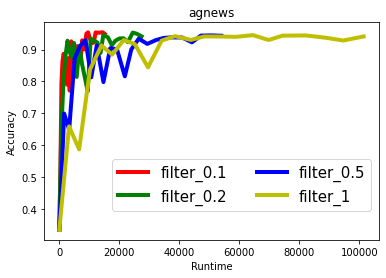

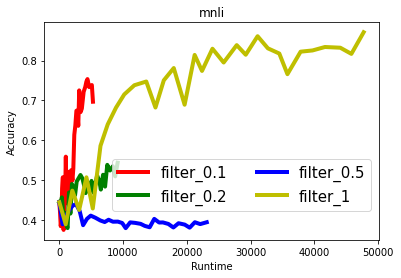

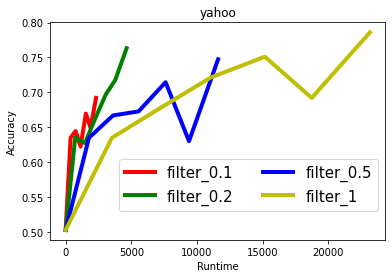

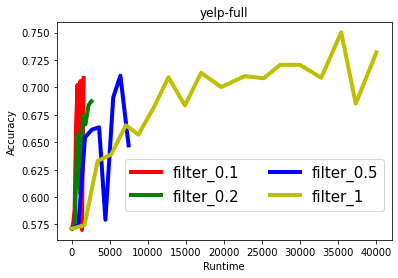

In [6]:
# round to variance
i=0
acc_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
round_list = {"agnews": [], "mnli": [], "yahoo": [], "yelp-full": []}
for dataset in datasets:

    root_path = f"/Users/cdq/Desktop/opensource/FedPrompt/data/ablation/filter/filter-bert-large-11.30/{dataset}/all_{all_client_num_in_total_list[dataset]}/seed_{seed}/pattern_{datasets[dataset]}/alpha_{alphas[dataset]}_beta_0_gamma_{gammas[dataset]}"


    fig = plt.figure()
    plt.title(dataset)
    for filename in filenames:
            
        log_path = os.path.join(root_path, filename)
        if not os.path.exists(log_path):
            print(f"{log_path} not exists")
            continue


        # plt.title(log_path)
        iter = 1000
        phrase1 = r'Normal ipet selection results. Client'
        phrase2 = r'Vote k selection results. Client'
        with open(log_path) as f:
            f = f.readlines()
        df1 = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        df2 = pd.DataFrame(data=None, index = range(iter), columns = range(1))
        gen = 0
        for line in f:
            if phrase1 in line:
                gen = gen + 1
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df1[0][gen]=acc
            if phrase2 in line:
                acc = float(re.findall(r': ?(\d+\.\d+)',line)[0])
                df2[0][gen]=acc
        
        df1 = df1.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        df2 = df2.dropna(axis=0, how='any') # any 只要有 nan 就会删掉。 all　是必须全是nan才删除; 0: 行；1：列
        
        iter = min(len(df2.index),len(df1.index))
        if df1.empty:
            # print(f"Bug: {log_path}")
            continue

        y1_mean = []
        for j in range(iter):
            y1 = np.array(df1.iloc[j])
            y1_mean.append(pd.DataFrame(y1).dropna().mean())


        if df2.empty:
            print(f"Bug: {log_path}")
            continue
        
        y2_mean = []
        for j in range(iter):
            y2 = np.array(df2.iloc[j])
            y2_mean.append(pd.DataFrame(y2).dropna().mean())
        
        print(f'{dataset}:{labels[filenames.index(filename)]} normal ipet: {np.mean(y1_mean)}, vote k: {np.mean(y2_mean)}')
        plt.plot(range(iter),np.array(y1_mean),label=f'{labels[filenames.index(filename)]}_normal',color=colors[filenames.index(filename)],linestyle='-')
        plt.plot(range(iter),np.array(y2_mean),label=f'{labels[filenames.index(filename)]}_sort',color=colors[filenames.index(filename)],linestyle='--')
    fig.legend(loc="lower right",bbox_to_anchor=(0.9,0.1),bbox_transform=fig.transFigure)
    # fig.savefig(f"../fig/a{i}.pdf")
    i = i+1

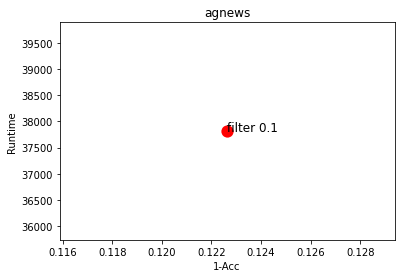

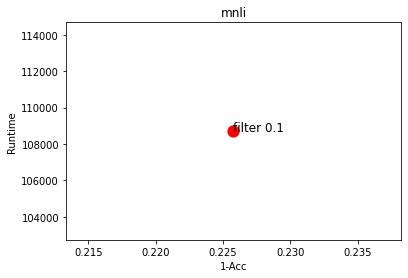

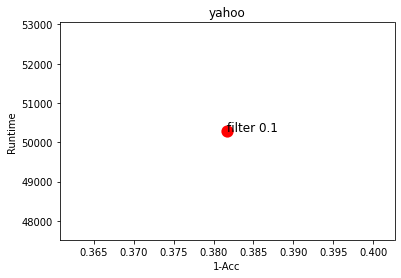

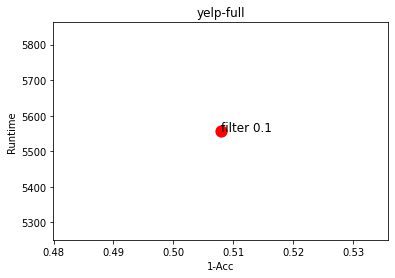

In [6]:
c=0
for dataset in datasets:
    fig = plt.figure()
    plt.title(f"{dataset}")
    plt.xlabel("1-Acc")
    plt.ylabel("Runtime")
    plt.scatter(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]),s=150,color=colors[:len(acc_list[dataset])],edgecolors='k',linewidths=linewidths[:len(acc_list[dataset])])
    for idx in range(len(acc_list[dataset])):
        plt.text(1-acc_list[dataset][idx], runtime_list[dataset][idx], labels[idx], fontsize=12)
    # plt.text(1- np.array(acc_list[dataset]), np.array(runtime_list[dataset]))
    plt.savefig(f"../fig/c{c}.pdf")
    c=c+1

In [17]:
acc_list

{'agnews': [0.8905263157894737,
  0.8855263157894737,
  0.8830263157894737,
  0.8873684210526316,
  0.8809210526315789,
  0.8843421052631579,
  0.8572368421052632,
  0.8747368421052631,
  0.8851315789473684,
  0.8759210526315789,
  0.8830263157894737,
  0.8725,
  0.8789473684210526],
 'mnli': [0.6820173204279164,
  0.6982170147733061,
  0.7471217524197656,
  0.7343861436576669,
  0.590728476821192,
  0.5721854304635762,
  0.7797249108507387,
  0.7282730514518594,
  0.5230769230769231,
  0.7145185939887927,
  0.43107488537952116,
  0.7316352521650535,
  0.6220071319409067],
 'yahoo': [0.66135,
  0.6488833333333334,
  0.6703,
  0.65765,
  0.6605333333333333,
  0.6584,
  0.6616833333333333,
  0.6488666666666667,
  0.6724,
  0.6515,
  0.6593333333333333,
  0.66835,
  0.6529333333333334],
 'yelp-full': [0.59498,
  0.57634,
  0.61142,
  0.6207,
  0.5939,
  0.60478,
  0.51584,
  0.60974,
  0.58922,
  0.60372,
  0.60274,
  0.5986,
  0.51436]}